In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

**Load Data**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


**Data Attribute**

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
train_images.ndim

3

In [ ]:
train_images.dtype

dtype('uint8')

**Data Visualization**

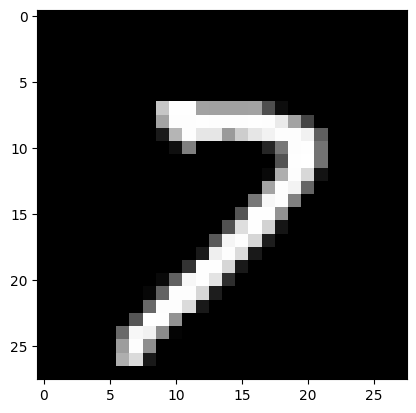

In [ ]:
digit = train_images[567]
plt.imshow(digit, cmap="gray")

In [ ]:
X_train = train_images.reshape(60000, 784)
X_test = test_images.reshape(10000, 784)

In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

**Data Normalization**

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
Y_train = np_utils.to_categorical(train_labels)
Y_test = np_utils.to_categorical(test_labels)

**Creating Model**

In [ ]:
My_Model = Sequential()
My_Model.add(Dense(500, activation="relu", input_shape=(784,)))
My_Model.add(Dropout(0.2))
My_Model.add(Dense(100, activation="relu"))
My_Model.add(Dropout(0.2))
My_Model.add(Dense(10, activation="softmax"))

In [ ]:
My_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
My_Model.compile(optimizer=SGD(learning_rate=0.001), loss=categorical_crossentropy, metrics=["accuracy"])

**Model Training**

In [ ]:
Network_history = My_Model.fit(X_train, Y_train, batch_size=128, epochs=60, validation_split=0.02)

Epoch 1/60
460/460 [==============================] - 7s 14ms/step - loss: 2.2036 - accuracy: 0.2280 - val_loss: 1.9419 - val_accuracy: 0.5942
Epoch 2/60
460/460 [==============================] - 5s 11ms/step - loss: 1.8764 - accuracy: 0.4669 - val_loss: 1.5703 - val_accuracy: 0.7717
Epoch 3/60
460/460 [==============================] - 6s 14ms/step - loss: 1.5801 - accuracy: 0.5926 - val_loss: 1.2446 - val_accuracy: 0.8292
Epoch 4/60
460/460 [==============================] - 5s 11ms/step - loss: 1.3377 - accuracy: 0.6574 - val_loss: 0.9929 - val_accuracy: 0.8625
Epoch 5/60
460/460 [==============================] - 6s 14ms/step - loss: 1.1545 - accuracy: 0.6981 - val_loss: 0.8121 - val_accuracy: 0.8817
Epoch 6/60
460/460 [==============================] - 5s 11ms/step - loss: 1.0178 - accuracy: 0.7275 - val_loss: 0.6847 - val_accuracy: 0.8933
Epoch 7/60
460/460 [==============================] - 6s 14ms/step - loss: 0.9193 - accuracy: 0.7467 - val_loss: 0.5946 - val_accuracy: 0.9025

In [ ]:
history = Network_history.history

In [ ]:
losses = history["loss"]
accuracies = history["accuracy"]
val_loss = history["val_loss"]
val_accuracy = history["val_accuracy"]

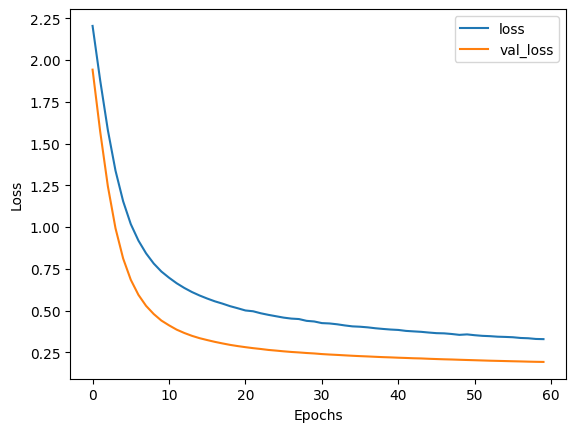

In [ ]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(losses)
plt.plot(val_loss)
plt.legend(["loss", "val_loss"])

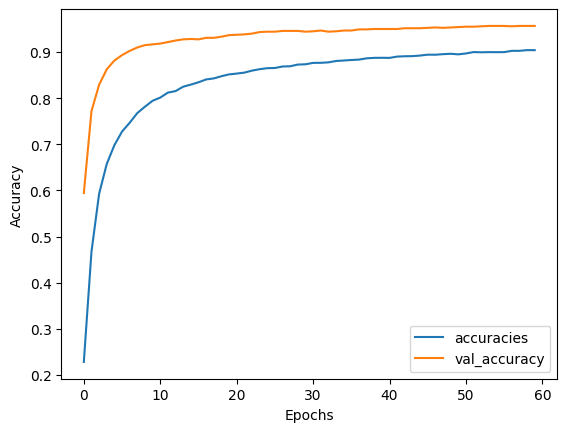

In [ ]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(accuracies)
plt.plot(val_accuracy)
plt.legend(["accuracies", "val_accuracy"])

**Evaluate**

In [ ]:
test_loss , test_accuracy = My_Model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2536 - accuracy: 0.9262


In [ ]:
test_label_predict = My_Model.predict(X_test)
test_label_predict = np.argmax(test_label_predict, axis=1)

313/313 [==============================] - 1s 3ms/step
